In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('E:\singapore\data\preprocessed.csv')
df.head(1)

,floor_area_sqm,lease_commence_date,remaining_lease,lat,long,distanceWithMrt,distanceWithRaffles,distanceWithGdPri,month,flat_type,storey_range,resale_price,resale_pricePersqm,model_Apartment,model_Maisonette,model_Model A,model_New Generation,model_Special,model_Standard
0,-2.201704,-1.263416,-1.066514,-0.055,0.158348,-0.83076,-0.765374,0.713007,2018-01,0,3,250000.0,5681.818182,0,0,0,0,0,1


In [73]:
df['flat_type'].value_counts()

flat_type
2                   23629
3                   14304
1                   13820
4                    4590
0                     984
MULTI-GENERATION       31
Name: count, dtype: int64

In [38]:
df = df.drop(['resale_pricePersqm'], axis=1)

In [29]:
df.head(3)

,floor_area_sqm,lease_commence_date,remaining_lease,lat,long,distanceWithMrt,distanceWithRaffles,distanceWithGdPri,month,flat_type,storey_range,resale_price,model_Apartment,model_Maisonette,model_Model A,model_Multi Generation,model_New Generation,model_Special,model_Standard
0,-2.199107,-1.263338,-1.066569,-0.055318,0.158116,-0.830713,-0.765637,0.713495,2018-01,0,3,250000.0,0,0,0,0,0,0,1
1,-1.255365,-1.263338,-1.127488,0.034538,-0.015409,1.177016,-0.641031,-0.653380,2018-01,1,0,240000.0,0,0,0,0,1,0,0
2,-1.214332,-1.033895,-0.978576,0.190363,0.045197,-0.334659,-0.487639,-0.124021,2018-01,1,0,240000.0,0,0,0,0,1,0,0


In [39]:
df['resale_price'] = df.pop('resale_price')

In [137]:
df.head(1)

,month,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,lat,long,distanceWithMrt,distanceWithRaffles,distanceWithGdPri,model_Apartment,model_Maisonette,model_Model A,model_New Generation,model_Special,model_Standard,resale_price
0,2018-01,0,3,44.0,1978,61.333333,1.366227,103.850086,416.686149,9162.186778,1396.42021,0,0,0,0,0,1,250000.0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57327 entries, 0 to 57326
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   month                 57327 non-null  object 
 1   flat_type             57327 non-null  int64  
 2   storey_range          57327 non-null  int64  
 3   floor_area_sqm        57327 non-null  float64
 4   lease_commence_date   57327 non-null  int64  
 5   remaining_lease       57327 non-null  float64
 6   lat                   57327 non-null  float64
 7   long                  57327 non-null  float64
 8   distanceWithMrt       57327 non-null  float64
 9   distanceWithRaffles   57327 non-null  float64
 10  distanceWithGdPri     57327 non-null  float64
 11  model_Apartment       57327 non-null  int64  
 12  model_Maisonette      57327 non-null  int64  
 13  model_Model A         57327 non-null  int64  
 14  model_New Generation  57327 non-null  int64  
 15  model_Special      

In [130]:
df.head(3)

,month,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,lat,long,distanceWithMrt,distanceWithRaffles,distanceWithGdPri,model_Apartment,model_Maisonette,model_Model A,model_New Generation,model_Special,model_Standard,resale_price
0,2018-01,0,3,44.0,1978,61.333333,1.366227,103.850086,416.686149,9162.186778,1396.420210,0,0,0,0,0,1,250000.0
1,2018-01,1,0,67.0,1978,60.583333,1.370097,103.837688,1321.143682,9713.392312,552.239946,0,0,0,1,0,0,240000.0
2,2018-01,1,0,68.0,1981,62.416667,1.376807,103.842018,640.152689,10391.930070,879.171242,0,0,0,1,0,0,240000.0


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit to continuous columns and transform
scaled_columns = ['resale_price']
scaler.fit(df[scaled_columns])
scaled_columns = pd.DataFrame(scaler.transform(df[scaled_columns]), index=df.index, columns=scaled_columns)

# separate unscaled features
unscaled_columns = df.drop(scaled_columns, axis=1)

# concatenate scaled and unscaled features
df = pd.concat([unscaled_columns,scaled_columns], axis=1)

In [41]:
df.head(1)

,floor_area_sqm,lease_commence_date,remaining_lease,lat,long,distanceWithMrt,distanceWithRaffles,distanceWithGdPri,month,flat_type,storey_range,model_Apartment,model_Maisonette,model_Model A,model_New Generation,model_Special,model_Standard,resale_price
0,-2.201704,-1.263416,-1.066514,-0.055,0.158348,-0.83076,-0.765374,0.713007,2018-01,0,3,0,0,0,0,0,1,-1.209996


In [42]:
train_start_date = '2018-01'
test_start_date = '2020-01'

train = df[df['month'] < test_start_date]
test = df[df['month'] >= test_start_date]

In [43]:
train = train.drop('month', axis= 1)
test = test.drop('month', axis= 1)

In [44]:
train_data = train.values
X = train_data[:, :-1]
Y = train_data[:, -1].reshape(train_data.shape[0], 1)

In [45]:
test_data = test.values
X_test = test_data[:, :-1]
Y_test = test_data[:, -1].reshape(test_data.shape[0], 1)

In [46]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

In [47]:
print('Shape of X_train:', X.shape)
print('Shape of Y_train:', Y.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (43698, 17)
Shape of Y_train: (43698, 1)
Shape of X_test: (13629, 17)
Shape of Y_test: (13629, 1)


In [15]:
df.head(1)

,resale_price,floor_area_sqm,lease_commence_date,remaining_lease,lat,long,distanceWithMrt,distanceWithRaffles,distanceWithGdPri,month,flat_type,storey_range,model_Apartment,model_Maisonette,model_Model A,model_New Generation,model_Special,model_Standard
0,-1.209996,-2.201704,-1.263416,-1.066514,-0.055,0.158348,-0.83076,-0.765374,0.713007,2018-01,0,3,0,0,0,0,0,1


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have your data in X_train, Y_train, X_test, and Y_test

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X, Y)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the model coefficients and performance metrics
print('Model Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2):', r2)

Model Coefficients: [[ 0.          0.60173597  0.35185737 -0.00446413 -0.11550091  0.01208708
  -0.16294506 -0.42195934 -0.00912052  0.08892487  0.0942743  -0.24272846
   0.12815203 -0.22400802 -0.14767319  0.74846542 -0.26220777]]
Intercept: [-0.20119809]
Mean Squared Error (MSE): 0.14158451258381716
R-squared (R2): 0.851083635351218


In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have your test data as X_test and y_test
predicted_log_y = model.predict(X_test)
predicted_y = np.exp(predicted_log_y)  # Convert back from log scale to original scale

mse = mean_squared_error(Y_test, predicted_y)
mae = mean_absolute_error(Y_test, predicted_y)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 6.3654973130986185
Mean Absolute Error: 1.591530945443895


In [50]:
predict_log_y = model.predict(X_test)
predict_y = np.exp(predicted_log_y)
mse = mean_squared_error(Y_test, predicted_y)
mae = mean_absolute_error(Y_test, predicted_y)
print('Mean squared error is:', mse)
print('Mean absolute error is:', mae)

Mean squared error is: 6.3654973130986185
Mean absolute error is: 1.591530945443895


In [51]:
Y

array([[-1.20999584],
       [-1.27479563],
       [-1.27479563],
       ...,
       [ 1.27183617],
       [ 2.28198716],
       [ 1.17463649]])

In [52]:
def model_ln(X, Y, learning_rate, iteration):
    m = Y.size
    theta = np.zeros((X.shape[1], 1))
    cost_list = []
    for i in range(iteration):
        y_pred = np.dot(X, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
        d_theta = (1/m) * np.dot(X.T, y_pred - Y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)
            
        if (i%(iteration/10) == 0):
            print('Cost is:', cost)
    return theta, cost_list

In [150]:
non_numeric_columns = train.select_dtypes(exclude=['int64', 'float64']).columns

print("Columns with non-numeric data:")
print(non_numeric_columns)

Columns with non-numeric data:
Index([], dtype='object')


In [53]:
iteration = 10000
learning_rate = 0.000000005
theta, cost_list=  model_ln(X, Y, learning_rate = learning_rate, iteration=iteration)
print(theta)

Cost is: 0.5076748454531874
Cost is: 0.5076668593019015
Cost is: 0.5076588737410788
Cost is: 0.507650888770647
Cost is: 0.5076429043905338
Cost is: 0.5076349206006668
Cost is: 0.507626937400974
Cost is: 0.5076189547913824
Cost is: 0.5076109727718204
Cost is: 0.5076029913422155
[[-7.27578801e-08]
 [ 3.17493965e-05]
 [ 1.55116761e-05]
 [-4.60429031e-07]
 [-1.34896062e-05]
 [ 6.67622290e-06]
 [-8.23416807e-06]
 [-1.63011623e-05]
 [-2.30737439e-07]
 [ 2.96433113e-05]
 [ 3.53021953e-05]
 [ 2.92646434e-06]
 [ 2.50514787e-06]
 [-3.45431145e-06]
 [-5.03868259e-06]
 [ 2.25998234e-06]
 [ 7.28641608e-07]]


In [ ]:
# X_train = train_data.drop('resale_price', inplace=True)
# y_train = train_data['resale_price']

# X_test = test_data.drop('resale_price', inplace=True)
# y_train = test_data['resale_price']

In [60]:
y_pred= np.dot(X_test, theta)
error = (1/X_test.shape[0])*np.sum(np.abs(y_pred - Y_test))


In [61]:
error

0.7525022916429183

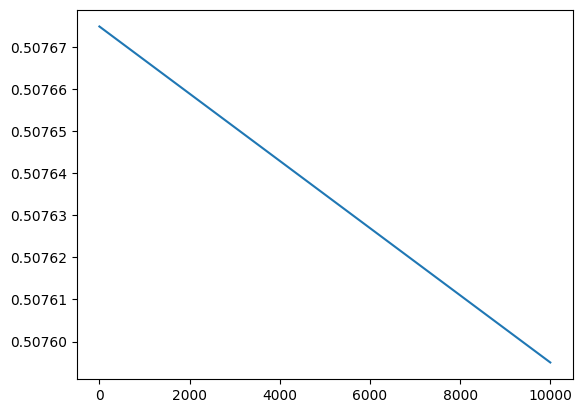

In [62]:
rng = np.arange(0, iteration)
plt.plot(rng, cost_list)
plt.show()

In [59]:
print(round(error, 4)*100, '%')
print(round(1 - error, 4)*100, '%')

75.25 %
24.75 %
